In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEAM REVIEWS
## Trabajo realizado para la asignatura de Cloud y Big Data
#### En este proyecto hemos realizado una estudio/an√°lisis sobre las reviews de steam extra√≠das de un conjunto de datos de 8Gb. 
La idea detr√°s del proyecto es analizar que tendencias se presentan a la hora de hacer rese√±as en la plataforma de steam, as√≠ como la extracci√≥n de datos de inter√©s para posibles desarrolladores. A medida que avancemos en este cuaderno podremos ver m√°s informaci√≥n de lo que acabamos de mencionar. 

Los CSVs que leemos en este notebook los hemos extra√≠do del c√≥digo que se puede ver en el siguiente github: https://github.com/AlbertoGarciaDomenech/Proyecto-Final-CLOUD

El conjunto de datos lo hemos sacado de Kaggle en el siguiente link: https://www.kaggle.com/datasets/najzeko/steam-reviews-2021

Para realizar el proyecto se ha usado Python como lenguaje, Pyspark a trav√©s de Cloud, Github como host para la web en la que mostramos los resultados y la informaci√≥n del proyecto y cuadernos de Jupyter. 


### 1. N√∫mero de palabras medio utilizadas en las reviews para cada juego

In [3]:
df_avg = pd.read_csv("AverageWordsForGame.csv")

In [4]:
df_avg.sort_values(by=['avg(len_review)'])

app_name  avg(len_review)
239  ‰∏âÂõΩÁæ§Ëã±‰º†8 Heroes of the Three Kingdoms 8         3.147454
101                           SenrenÔºäBanka         6.755264
176                                 Mirror         8.308165
0                         Human: Fall Flat         8.838864
4                         Wallpaper Engine         9.522624
..                                     ...              ...
90                   Pathfinder: Kingmaker       105.042774
220                              X Rebirth       105.625768
202                     METAL GEAR SURVIVE       120.399610
47              Torment: Tides of Numenera       159.705082
30                          Secret of Mana       171.449474

[315 rows x 2 columns]

A primera vista podemos observar que hay una gran diferencia entre el juego con menor n√∫mero medio de palabras y el juego con mayor. Vamos a ver algunos valores estad√≠sticos para sacar algo en claro

In [6]:
df_avg.describe().transpose()

count       mean        std       min        25%        50%  \
avg(len_review)  315.0  42.651427  22.655097  3.147454  27.216837  37.554922   

                       75%         max  
avg(len_review)  55.067488  171.449474

La media general es de 42 palabras por review, por lo que en la tabla inicial los juegos con mayor media estaban m√°s alejados de la media que los juegos con menor media. Por ejemplo el cuarto percentil empieza con 55 palabras de media, que est√° mucho m√°s cerca del juego con menor media (3) que con el de mayor media (171)

Tambi√©n pensamos que igual la longitud de las reviews estaba relacionado de alguna manera con la calidad del juego o con el n√∫mero de las mismas as√≠ que m√°s adelante estudiaremos la correlaci√≥n entre estas variables para intentar averiguar si alguna de estas depende de otras. 

A continuaci√≥n vamos a separar el numero medio de palabras utilizada por review dependiendo de si se trata de una review favorable o de una en la que el usuario no recomienda el juego del que ha escrito

### 2. Numero de palabras medio haciendo distinci√≥n entre reviews positivas y negativas

Antes de pasar a analizar los resultados vamos a dejar escrito algunas ideas que tenemos sobre lo que va a suceder
- Creemos que las reviews negativas van a tener mayor numero medio de palabras
- Creemos que la tabla con las reviews positivas va a ser muy parecida a la anterior
- Creemos que va a haber algun juego con algun valor anormalmente grande en las reviews negativas

In [7]:
df_positivas = pd.read_csv("AverageWordPositive.csv")
df_positivas.sort_values(by=['avg(len_review)'])

app_name  avg(len_review)
239  ‰∏âÂõΩÁæ§Ëã±‰º†8 Heroes of the Three Kingdoms 8         3.104340
101                           SenrenÔºäBanka         6.527178
176                                 Mirror         7.841331
0                         Human: Fall Flat         8.618650
238                         Neon Hardcorps         8.966292
..                                     ...              ...
292                      Deus Ex: The Fall       109.814159
220                              X Rebirth       118.583502
202                     METAL GEAR SURVIVE       131.427286
47              Torment: Tides of Numenera       153.998403
30                          Secret of Mana       176.775994

[315 rows x 2 columns]

In [8]:
df_negativas = pd.read_csv("AverageWordNegative.csv")
df_negativas.sort_values(by=['avg(len_review)'])

app_name  avg(len_review)
239  ‰∏âÂõΩÁæ§Ëã±‰º†8 Heroes of the Three Kingdoms 8         3.206174
86                   Battle Royale Trainer        10.645113
0                         Human: Fall Flat        12.462647
4                         Wallpaper Engine        12.616216
250                          Overcooked! 2        14.570101
..                                     ...              ...
306                            Axiom Verge       163.036101
47              Torment: Tides of Numenera       172.748175
90                   Pathfinder: Kingmaker       173.455722
230                              ULTRAKILL       182.384615
245                       Thimbleweed Park       193.063218

[315 rows x 2 columns]

In [13]:
df_positivas.describe().transpose()

count       mean        std      min       25%        50%  \
avg(len_review)  315.0  40.272878  22.545323  3.10434  25.40357  34.853607   

                       75%         max  
avg(len_review)  50.814023  176.775994

In [12]:
df_negativas.describe().transpose()

count       mean        std       min        25%        50%  \
avg(len_review)  315.0  67.281037  31.349083  3.206174  46.222587  62.931152   

                       75%         max  
avg(len_review)  85.119601  193.063218

Viendo los resultados y lo que hemos planteado al inicio podemos ver que hemos acertado en dos de los tres puntos mencionados.
Por una parte la media de palabras en las reviews negativas es mayor que en el caso de las reviews positivas. Sin embargo s√≠ que esperabamos que fuese aun mayor dicha diferencia pero al ser un conjunto tan grande de datos es normal que se normalice a valores m√°s bajos de lo que cabr√≠a esperar
Tambi√©n podemos ver que la tabla de reviews positivas es m√°s parecida a la de reviews en general que la de negativas, que incluye nuevos juegos que no aparecen en ninguna de las dos tablas. Esto se debe a que hay m√°s reviews positivas que negativas en general, como estudiaremos m√°s adelante. 
El tercer punto no se cumple y creemos que se debe a lo mencionado anteriormente. El conjunto de datos es lo suficientemente grande para que no haya valores anormalmente altos. 

Cuando dijimos que cre√≠amos que las reviews negativas tendr√≠an m√°s palabras de media nos bas√°bamos en la tendencia real que tenemos como seres humanos a enfocarnos m√°s en los puntos negativos que en los positivas. Cuando hablamos de algo que no nos ha gustado solemos usar m√°s palabras para intentar desahogarnos que cuando algo s√≠ nos ha gustado

In [16]:
df_positivas = df_positivas.sort_values(by=['app_name'])
df_negativas = df_negativas.sort_values(by=['app_name'])

In [40]:
valores_pos = list(df_positivas['avg(len_review)'])[0:10]
valores_neg = list(df_negativas['avg(len_review)'])[0:10]

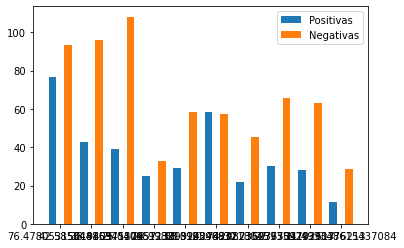

In [41]:
x = np.arange(10)
width = 0.25
plt.bar(x - width, valores_pos, width=width, label='Positivas')
plt.bar(x + width, valores_neg, width=width, label='Negativas')
plt.xticks(x, valores_pos)
plt.legend(loc='best')
plt.show()

Hemos seleccionado los primeros 10 juegos que han aparecido en ambas tablas y los hemos puesto en el mismo diagrama de barras. Como podemos ver, en 9 de los 10 casos el numero medio de palabras utilizado en las reviews negativas es mayor que en las reviews positivas. Vamos a ver el caso en el que no sucede esto. 

In [52]:
df_positivas.iloc[[5]]['app_name']

290    ATLAS
Name: app_name, dtype: object

In [50]:
df_positivas.loc[df_positivas['app_name'] == 'ATLAS'] 

app_name  avg(len_review)
290    ATLAS        58.319549

In [49]:
df_negativas.loc[df_negativas['app_name'] == 'ATLAS'] 

app_name  avg(len_review)
290    ATLAS        57.516516

'ATLAS' es el juego que escapa un poco de la t√≥nica general aunque tan solo es una palabra m√°s de media. Cu√°ndo calculemos otros valores como el n√∫mero de rese√±as o la valoraci√≥n de los juegos volveremos a tratar este punto para encontrar la l√≥gica detr√°s de este suceso

### 3. Numero de reviews para cada juego

In [58]:
df_numreviews = pd.read_csv("NumReviewsForGame.csv")
df_numreviews = df_numreviews.sort_values(by=["count"])
df_numreviews

app_name    count
238                   Neon Hardcorps      200
151          DRAGON QUEST HEROES‚Ñ¢ II      600
113        Shadow Complex Remastered      700
65       Out of the Park Baseball 19      700
182  Don't Escape: 4 Days to Survive     1013
..                               ...      ...
192                      Garry's Mod   655524
23                          Terraria   672815
79    Tom Clancy's Rainbow Six Siege   841918
107               Grand Theft Auto V  1019116
124    PLAYERUNKNOWN'S BATTLEGROUNDS  1644255

[315 rows x 2 columns]

In [65]:
df_numreviews.describe().transpose()

count          mean            std    min     25%      50%      75%  \
count  315.0  69039.273016  151035.465211  200.0  6606.5  22437.0  62222.5   

             max  
count  1644255.0

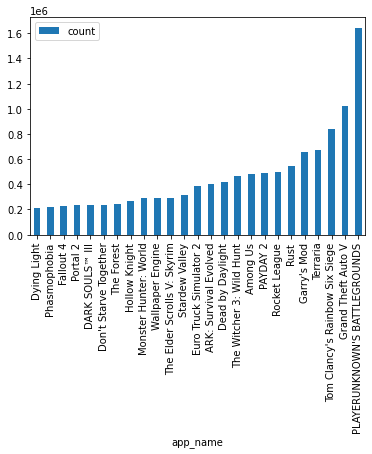

In [62]:
topreviews = df_numreviews.tail(25)
topreviews.plot.bar(x='app_name').get_figure().savefig('Top_reviews')

Vemos que hay una gran diferencia entre algunos juegos y otros. 'PLAYERUNKNOWNS's battlegrounds' es el juego con mayor n√∫mero de rese√±as, teniendo m√°s de un mill√≥n seiscientas. 
La otra cara de la moneda le corresponde a 'NEON Hardcops' que tan solo cuenta con 200 rese√±as. 

Viendo la media y la desviaci√≥n tipica queda demostrada la gran diferencia entre los propios juegos aunque en el cuarto percentil podemos ver que empieza por un n√∫mero menor que el de la media, por lo que vemos que los juegos con mayor numero de reviews condicionan mucho al resto de datos. Unos pocos juegos acaparan la gran mayor√≠a de reviews aunque sean menos juegos que el resto

In [63]:
df_numreviews = df_numreviews.sort_values(by=['app_name'])

In [64]:
df_numreviews.iloc[[5]]

app_name  count
290    ATLAS  37210

En el apartado anterior vimos que en el caso del juego 'ATLAS' no se cumpl√≠a la tendencia de escribir m√°s palabras en las reviews negativas que en las positivas. Ahora vemos que el numero de reviews de este juego es bastante inferior a la media y a√∫n contando la desviaci√≥n seguir√≠a estando por debajo. Con esto podemos intuir que simplemente se trataba de un caso especial, o que la diferencia era tan escasa que no hab√≠a ning√∫n motivo para encontrar una l√≥gica. 

### 4. Correlaci√≥n entre numero medio de palabras y numero de reviews por juego

Viendo las tablas hemos llegado a un pensamiento en el que creemos que puede existir alguna correlaci√≥n entre el numero medio de palabras que se utiliza en las reviews y el numero de las mismas para cada juego. Creemos que cuantas m√°s reviews tenga un juego m√°s probable es que se hayan utilizado menos palabras de media. Pensamos esto por la tendencia de las reviews a ser m√°s cortas que largas, como hemos visto antes. 

In [66]:
df_numreviews['count'].corr(df_avg['avg(len_review)'])

-0.30029140621500905

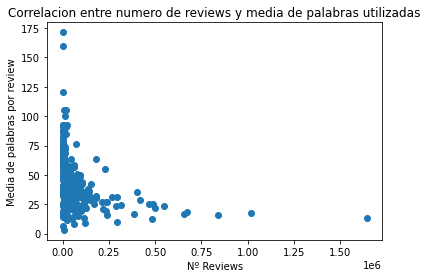

[[ 1.         -0.30029141]
 [-0.30029141  1.        ]]


In [69]:
df_numreviews = df_numreviews.sort_values(by=['app_name'])
df_avg = df_avg.sort_values(by=['app_name'])
x = list(df_numreviews['count'])
y = list(df_avg['avg(len_review)'])
plt.scatter(x, y)
plt.title('Correlacion entre numero de reviews y media de palabras utilizadas')
plt.xlabel('N¬∫ Reviews')
plt.ylabel('Media de palabras por review')
plt.show()
print(np.corrcoef(x, y))

A pesar de lo que cre√≠amos, la correlaci√≥n entre el n√∫mero de reviews que tiene un juego y el numero medio de palabras utilizado por reviews no es muy fuerte. No se puede afirmar que haya alguna relaci√≥n entre estos dos conceptos aunque s√≠ que est√° cerca de nuestro pensamiento inicial que aseguraba que a la hora de escribir rese√±as la tendencia era de usar menos palabras. Es decir, pensabamos que lo normal en esta web era escribir reviews cortas por encima de largas.

Aunque la correlaci√≥n sea √∫nicamente de -0.3 se puede intuir levemente que nuestro pensamiento no iba mal encaminado

### 5. Porcentajes de reviews favorables por juego

A continuaci√≥n vamos a ver los porcentajes de reviews favorables de cada juego. Aunque este no sea el medidor oficial para saber la valoraci√≥n que tiene un juego lo trataremos como tal ya que consideramos que si un juego tiene un 99% de reviews favorables va a ser un juego mejor valorado que otro que tenga un 80%, por poner un ejemplo

In [70]:
df_percentages = pd.read_csv("PercentagesReviewsGame.csv")
df_percentages = df_percentages.sort_values(by=['app_name'])
df_percentages

app_name  recommended   count  porcentaje
135                                   20XX         True    3349    0.927701
21                           A Hat in Time         True   34318    0.981103
2                             A Short Hike         True    5797    0.991449
163                              A Way Out         True    9766    0.892606
245                  ARK: Survival Evolved         True  315243    0.788090
..                                     ...          ...     ...         ...
192                                 XCOM 2         True   52732    0.855539
124                               Yakuza 0         True   29774    0.937026
259                         Youtubers Life         True    9566    0.757943
194           theHunter: Call of the Wild‚Ñ¢         True   57452    0.854432
285  ‰∏âÂõΩÁæ§Ëã±‰º†8 Heroes of the Three Kingdoms 8         True    4677    0.576624

[315 rows x 4 columns]

In [71]:
df_percentages = df_percentages.sort_values(by=['porcentaje'])
df_percentages

app_name  recommended   count  porcentaje
314                       Identity         True     439    0.243348
313     RollerCoaster Tycoon World         True    1300    0.245098
312                            SOS         True    1921    0.278406
311                 Umbrella Corps         True     707    0.282236
310                       NBA 2K18         True    5465    0.291965
..                             ...          ...     ...         ...
4                         Factorio         True  107111    0.989186
3    The Henry Stickmin Collection         True   19211    0.990258
2                     A Short Hike         True    5797    0.991449
1                     SenrenÔºäBanka         True    5004    0.994041
0                        ULTRAKILL         True    5558    0.995344

[315 rows x 4 columns]

In [72]:
df_percentages.describe().transpose()

count          mean            std        min          25%  \
count       315.0  60389.238095  119504.734523  89.000000  5019.000000   
porcentaje  315.0      0.843161       0.169227   0.243348     0.803483   

                    50%           75%            max  
count       19335.00000  57671.500000  886417.000000  
porcentaje      0.90075      0.963009       0.995344

Aqu√≠ podemos ver que la media gira en torno al 85%. En este caso vemos que hay una tendencia favorable en contraposici√≥n de lo que hab√≠amos visto anteriormente. 
Es l√≥gico que la media favorezca las buenas notas teniendo en cuenta que hay muchas m√°s reviews positivas que negativas en la plataforma de Steam. 
El primer percentil acaba con 80% de reviews favorables por lo que vemos y sabemos de buena mano que hay muy pocos juegos que no lleguen al 50%

Vamos a volver al caso de 'ATLAS' para ver que porcentaje de reviews positivas tiene

In [73]:
df_percentages = df_percentages.sort_values(by=['app_name'])
df_percentages.iloc[[5]]

app_name  recommended  count  porcentaje
293    ATLAS         True  17290     0.46466

Como vemos ATLAS es uno de los pocos juegos que no aprueban. Esto sigue sin decirnos si tiene que ver con que la longitud de las reviews positivas sea mayor que la de las negativas en este caso. M√°s adelante estudiaremos otra correlaci√≥n para intentar encontrar un sentido

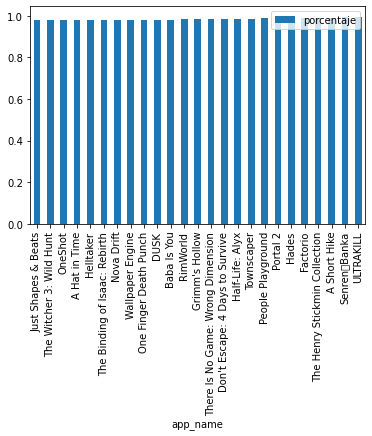

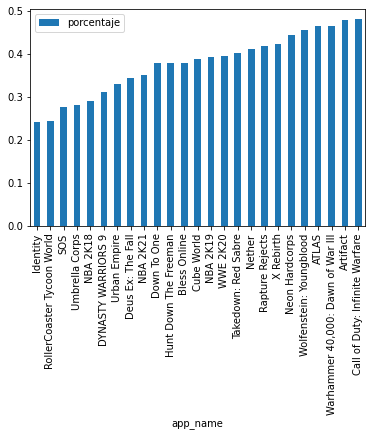

In [82]:
df_percentages = df_percentages.sort_values(by=['porcentaje'])
toppercentages = df_percentages.tail(25)
worstpercentages = df_percentages.head(25)
fig1 = toppercentages.plot(x='app_name', y='porcentaje', kind='bar')
fig2 = worstpercentages.plot(x='app_name', y='porcentaje', kind='bar')

Como vemos en las dos gr√°ficas anteriores hay una gran diferencia entre los 25 juegos con mayor porcentaje de rese√±as positivas y los 25 juegos con menor. 

### 6. Numero de reviews por juego e idioma 

In [84]:
df_numreviews2 = pd.read_csv('ReviewsPerGameAndLanguage.csv')
df_numreviews2 = df_numreviews2.sort_values(by=['app_name'])
df_numreviews2

app_name    language  count
5343                                   20XX     koreana     54
3222                                   20XX     italian      3
2346                                   20XX      french     54
3264                                   20XX      polish      4
4055                                   20XX     english   2593
...                                     ...         ...    ...
2422  ‰∏âÂõΩÁæ§Ëã±‰º†8 Heroes of the Three Kingdoms 8     koreana     15
2469  ‰∏âÂõΩÁæ§Ëã±‰º†8 Heroes of the Three Kingdoms 8  vietnamese      2
16    ‰∏âÂõΩÁæ§Ëã±‰º†8 Heroes of the Three Kingdoms 8    tchinese    565
8017  ‰∏âÂõΩÁæ§Ëã±‰º†8 Heroes of the Three Kingdoms 8     english     65
275   ‰∏âÂõΩÁæ§Ëã±‰º†8 Heroes of the Three Kingdoms 8    schinese   7461

[8412 rows x 3 columns]

Una vez hemos obtenido este CSV nos damos cuenta de que tan solo es verdaderamente √∫til para tratar juegos espec√≠ficos m√°s que para sacar alguna conclusi√≥n general. Por esto vamos a volver al caso de 'ATLAS', para ver que ocurre en el √∫nico juego en el que hemos hecho distinci√≥n de momento. 

In [85]:
df_numreviews2.loc[df_numreviews2['app_name'] == 'ATLAS'] 

app_name    language  count
7738    ATLAS     russian   2385
3850    ATLAS     english  19623
2791    ATLAS   ukrainian     16
5340    ATLAS       latam    156
5524    ATLAS    tchinese    166
5768    ATLAS      french   1562
5339    ATLAS   norwegian     84
5769    ATLAS    romanian     11
6441    ATLAS     spanish   2289
7079    ATLAS     swedish    157
2886    ATLAS  vietnamese      8
7836    ATLAS    japanese    171
813     ATLAS       czech    165
5161    ATLAS     turkish    480
2830    ATLAS   hungarian    130
2415    ATLAS     italian    228
2790    ATLAS   brazilian    684
645     ATLAS      german   3258
5880    ATLAS    schinese   4404
6839    ATLAS      danish    106
1456    ATLAS   bulgarian      5
7883    ATLAS     koreana    139
2926    ATLAS       dutch    227
3083    ATLAS      polish    344
8284    ATLAS     finnish     62
2080    ATLAS       greek     26
6756    ATLAS  portuguese     97
3260    ATLAS        thai    227

Vemos que hay mucha variedad de idiomas para tratarse de un juego con 37000 rese√±as y que no llega al 50% en cuanto a porcentajes de reviews favorables.

Sin embargo, por mucha variedad que haya vemos que predomina el ingl√©s seguido del ruso y del espa√±ol. ¬øEsto va a ser la t√≥nica general o es tan solo en este caso? Para resolver esta pregunta en el siguiente apartado vamos a estudiar los idiomas m√°s utilizados en las rese√±as de la plataforma

### 7. Idiomas m√°s utilizados

In [89]:
df_languages = pd.read_csv('LanguagesUsed.csv')
df_languages = df_languages.sort_values(by=['count'])
df_languages

language    count
27  vietnamese     6580
26   bulgarian    10454
25       greek    14472
24   ukrainian    21169
23    romanian    32730
22   norwegian    36797
21     finnish    54712
20      danish    55915
19       latam    70103
18   hungarian    71001
17       dutch    77555
16     swedish    80226
15  portuguese    81386
14    japanese    81754
13        thai   127503
12     italian   133307
11       czech   133980
10    tchinese   218203
9       polish   495529
8       french   541751
7      koreana   613632
6      turkish   635868
5       german   752596
4      spanish   813320
3    brazilian   837524
2      russian  2348900
1     schinese  3764967
0      english  9635437

En el apartado anterior nos preguntabamos si lo normal era que el ingl√©s fuese el idioma m√°s utilizado seguido del ruso y del espa√±ol. En la tabla anterior podemos ver que efectivamente el ingl√©s si es el idioma m√°s utilizado aunque el que le sigue es el chino, por encima del ruso. El espa√±ol alcanza la quinta posici√≥n.

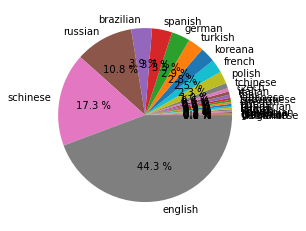

In [94]:
languages = list(df_languages['language'])
nreviews = list(df_languages['count'])
plt.pie(nreviews, labels=languages, autopct="%0.1f %%")
plt.show()

Vemos que el ingl√©s monopoliza hasta un 44.3% todas las rese√±as que se han extra√≠do del conjunto de datos. El chino y el ruso tambi√©n ocupan un 17.3% y un 10.8% respectivamente. 
Entre estos tres idiomas suman un 72,4% de todas las rese√±as de la plataforma, casi 3/4. No es tanto si tenemos en cuenta la gran cantidad de poblaci√≥n mundial que tiene el ingl√©s o el chino como primera lengua, y tambi√©n hay que tener en cuenta la accesibilidad a steam ya que tiene m√°s facil acceder a esta plataforma un brit√°nico que una persona que viva en alg√∫n pais subdesarrollado 

### 8. Porcentajes de reviews favorables segun el idioma

In [108]:
df_percentages_languages = pd.read_csv('LanguagePercentageRecommended.csv')
df_percentages_languages = df_percentages_languages[df_percentages_languages['recommended'] == 1]
df_percentages_languages = df_percentages_languages.sort_values(by=['porcentaje'])
df_percentages_languages

recommended    language    count  porcentaje
41         True    schinese  2902943    0.771041
25         True    japanese    65848    0.805441
46         True    tchinese   182088    0.834489
27         True     koreana   516673    0.841992
16         True      german   666223    0.885233
10         True     english  8584444    0.890924
39         True     russian  2095434    0.892092
23         True     italian   120023    0.900350
2          True   bulgarian     9434    0.902430
51         True     turkish   573984    0.902678
15         True      french   490391    0.905196
48         True        thai   116175    0.911155
18         True       greek    13262    0.916390
30         True   norwegian    33761    0.917493
55         True  vietnamese     6049    0.919301
12         True     finnish    50318    0.919689
6          True      danish    51428    0.919753
9          True       dutch    71351    0.920005
20         True   hungarian    65501    0.922536
52         True   ukrainian    19584    0.925126
44         True     swedish    74453    0.928041
42         True     spanish   754956    0.928240
4          True       czech   124377    0.928325
1          True   brazilian   790634    0.944014
32         True      polish   468655    0.945767
35         True  portuguese    77026    0.946428
29         True       latam    66350    0.946464
36         True    romanian    31245    0.954629

En la celda anterior hemos filtrado para mostrar unicamente el porcentaje de reviews favorables ya que el de reviews negativas se puede calcular restando el anterior a uno. 

Como vemos nos encontramos con una t√≥nica favorable como cab√≠a esperar pero nos sorprende china. Las reviews que se han redactado en chino suelen ser un poco m√°s negativas que en el resto de idiomas. Pero no solo en chino, tambi√©n en japon√©s y coreano. Parece indicar que en Asia hay una tendencia m√°s exigente a la hora de recomendar un juego que en occidente. 

Tambi√©n vemos que el ingl√©s est√° en una posici√≥n relativamente baja teniendo en cuenta que es el idioma m√°s utilizado. ¬øCuanta m√°s rese√±as haya en un idioma, es m√°s probable que haya mayor porcentaje de reviews negativas? Lo resolveremos en el siguiente apartado

In [114]:
df_percentages_languages.describe().transpose()

count           mean           std          min           25%  \
count        28.0  679378.928571  1.682113e+06  6049.000000  51150.500000   
porcentaje   28.0       0.904472  4.310940e-02     0.771041      0.898286   

                     50%            75%           max  
count       96600.500000  531000.750000  8.584444e+06  
porcentaje      0.918397       0.928091  9.546288e-01

Aqu√≠ observamos que la media es de 90%

### 9. Correlaci√≥n entre numero de reviews por idioma y porcentajes de reviews positivas

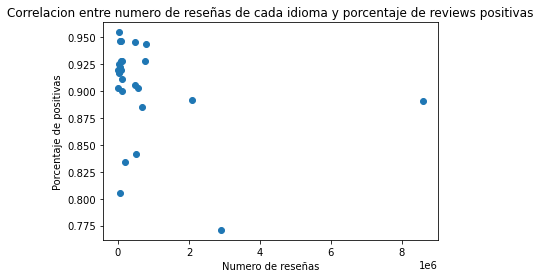

[[ 1.         -0.25974968]
 [-0.25974968  1.        ]]


In [116]:
x = list(df_percentages_languages['count'])
y = list(df_percentages_languages['porcentaje'])
plt.scatter(x, y)
plt.title('Correlacion entre numero de rese√±as de cada idioma y porcentaje de reviews positivas')
plt.xlabel('Numero de rese√±as')
plt.ylabel('Porcentaje de positivas')
plt.show()
print(np.corrcoef(x, y))

En el anterior apartado nos preguntabamos si hab√≠a alguna correlaci√≥n entre el n√∫mero de rese√±as que hay en un idioma y el porcentaje de rese√±as positivas que tiene dicho idioma. Aqu√≠ vemos que no. La correlaci√≥n es muy baja, tan solo de un 0.25. 

Es por esto por lo que no podemos asegurar que cuantas m√°s rese√±as haya en un idioma, mayor es el porcentaje de reviews negativas. Aunque s√≠ que sigue la tendencia, el valor de correlaci√≥n no es lo suficientemente alto para afirmarlo

### 10. Las 30 reviews con mayor 'helpful votes'

In [117]:
df_helpful = pd.read_csv('30reviewsmostliked.csv')
df_helpful

app_name  \
0   The Witcher 3: Wild Hunt   
1   The Witcher 3: Wild Hunt   
2   The Witcher 3: Wild Hunt   
3   The Witcher 3: Wild Hunt   
4   The Witcher 3: Wild Hunt   
5   The Witcher 3: Wild Hunt   
6   The Witcher 3: Wild Hunt   
7   The Witcher 3: Wild Hunt   
8   The Witcher 3: Wild Hunt   
9   The Witcher 3: Wild Hunt   
10  The Witcher 3: Wild Hunt   
11  The Witcher 3: Wild Hunt   
12  The Witcher 3: Wild Hunt   
13  The Witcher 3: Wild Hunt   
14  The Witcher 3: Wild Hunt   
15  The Witcher 3: Wild Hunt   
16           Êä±Ê≠âËøô‰∏™Ê¢óÊàëÁé©‰∏ÄËæàÂ≠ê(ÁãóÂ§¥)"   
17  The Witcher 3: Wild Hunt   
18  The Witcher 3: Wild Hunt   
19  The Witcher 3: Wild Hunt   
20  The Witcher 3: Wild Hunt   
21  The Witcher 3: Wild Hunt   
22  The Witcher 3: Wild Hunt   
23  The Witcher 3: Wild Hunt   
24  The Witcher 3: Wild Hunt   
25  The Witcher 3: Wild Hunt   
26  The Witcher 3: Wild Hunt   
27  The Witcher 3: Wild Hunt   
28  The Witcher 3: Wild Hunt   
29  The Witcher 3: Wild Hunt   
30  The Witcher 3: Wild Hunt   
31  The Witcher 3: Wild Hunt   

                                               review  
0   üéÅ\nüéÅ‚Äô[h1] [b]‚ÄòÂÆòÊñπÂ•ñÂä±ÂÖçË¥πÊ¥ªÂä®ÈìæÊé•:‚Üí  https://usnhskhf.w...  
1                             ÂØªË∑ØÂäüËÉΩÁúüÁöÑÊúâÁÇπÈò¥Èó¥ÔºåÊÄª‰Ωì‰∏äËÆ≤ËøòÊòØÂæà‰∏çÈîôÁöÑÊ∏∏Êàè  
2   Se um dia algu√©m falar que esse jogo √© ruim na...  
3                             ‰∏çÁé©Ê≠§ÁîüÈÅóÊÜæÔºåRPGÊ∏∏ÊàèÈáåÁöÑÂ§©Ëä±ÊùøÔºåÂ§™Âê∏Âºï‰∫∫‰∫Ü  
4                                  ÊãîDIAOÊó†ÊÉÖÊâìÊ°©Êú∫--Êù∞Ê¥õÁâπ!!!  
5                                               Â∑´Â∏à3NB  
6   One of the best RPG's of all time, worthy of a...  
7                                                  Â§ß‰Ωú  
8              good story, good graphics. lots to do.  
9                                            dis gud,  
10                                                  .  
11                                   Âπ¥Â∫¶ÊúÄ‰Ω≥ÁöÑ‰ΩúÂìÅÔºåÊ≤°Âï•Â•ΩÂ§∏ÁöÑÔºåÁ•û‰Ωú  
12                                         great game  
13                                             Á•û‰ΩúÔºÅ‰∏çbb  
14  –®–∏–∫–∞—Ä–Ω–∞—è –∏–≥—Ä–∞ —Å –æ—Ç–ª–∏—á–Ω—ã–º —Å—é–∂–µ—Ç–æ–º, –Ω–µ–ø–ª–æ—Ö–æ–π –≥—Ä–∞...  
15           ‰ªÄ‰πà?‰Ω†ÂÑøÂ≠êÂ§±Ë∏™‰∫Ü?‰ªÄ‰πà?ËøôÊ†ãÊàøÂ≠êÈóπÈ¨º?‰ªÄ‰πà?‰Ω†ÁåúÂà∞ÊàëË¶ÅÁé©\Êù•Âè•ÊòÜÁâπÁâå\"ÁöÑÊ¢ó?  
16                                                NaN  
17  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è –∫–∞—Ä—Ç–æ—á–Ω–∞—è –∏–≥—Ä–∞ –≤ –∞–Ω—Ç—É—Ä–∞–∂–µ —Ñ—ç–Ω—Ç–µ–∑...  
18                                              Í∞ÄÏÑ±ÎπÑ Ïß±  
19  The witcher 3 es un gran juego RPG, permite gr...  
20                                 ÂΩì‰Ω†Áé©ËøõÂéª‰πãÂêéÔºå‰∏ÄÂàáÈÉΩÈ°∫ÁêÜÊàêÁ´†‰∫ÜËµ∑Êù•  
21                                           ÂâëËàûÂ§©‰∏ãÊó†ÊïåÔºÅÔºÅ  
22  favorite game of all time cant wait for the Ne...  
23                                                 ÊâìÊ°©  
24                          Why wouldn't you get this  
25                                           it is ok  
26                                              worth  
27  Isn't Geralt hot enough to get both Yennefer a...  
28                        Very Fun, Would play again!  
29                                          NICE GAME  
30  M√°s optimizado que el 2, me corre en una Lapto...  
31                                         bom demais

Aqu√≠ nos hemos podido dar cuenta de que hab√≠a un problema con la columna de 'votes_helpful' de nuestro conjunto de datos, ya que el codigo para obtener las reviews es correcto.

En este apartado quer√≠amos estudiar que es lo que se valoraba m√°s en una rese√±a. Si el ingenio, la brevedad, o la extensi√≥n de la misma, entre otros criterios

### 11. Correlaci√≥n entre valoraciones de un juego y el numero de rese√±as que tiene

Tambi√©n nos ha surgido la curiosidad y queremos ver si hay alguna relaci√≥n entre las valoraciones de un juego y el numero de rese√±as que tiene el mismo. 

In [121]:
df_percentages = df_percentages.sort_values(by=['app_name'])
df_numreviews = df_numreviews.sort_values(by=['app_name'])

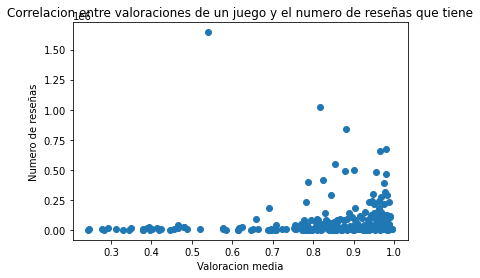

[[1.         0.08548442]
 [0.08548442 1.        ]]


In [122]:
x = list(df_percentages['porcentaje'])
y = list(df_numreviews['count'])
plt.scatter(x, y)
plt.title('Correlacion entre valoraciones de un juego y el numero de rese√±as que tiene')
plt.xlabel('Valoracion media')
plt.ylabel('Numero de rese√±as')
plt.show()
print(np.corrcoef(x, y))

Al contrario que en otros casos, aqu√≠ queda descartado por completo cualquier correlaci√≥n entre el numero de rese√±as y las valoraciones del juego. 

Con esto queriamos averiguar s√≠ el hecho de que un juego tenga m√°s rese√±as implica que haya m√°s polaridad sobre la opini√≥n p√∫blica del juego o no, pero hemos visto que acaba siendo independientes el uno del otro